# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

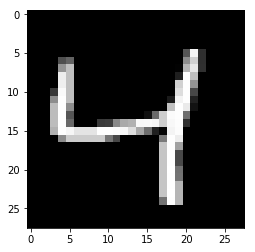

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [5]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value
image_size = mnist.train.images.shape[1]
learning_rate = 0.001

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, shape=(None, image_size), name='inputs')
targets_ = tf.placeholder(tf.float32, shape=(None, image_size), name='targets')

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, units=encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, units=image_size, activation=None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits)

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(learning_rate).minimize(cost)

## Training

In [6]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [7]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6945
Epoch: 1/20... Training loss: 0.6914
Epoch: 1/20... Training loss: 0.6882
Epoch: 1/20... Training loss: 0.6852
Epoch: 1/20... Training loss: 0.6812
Epoch: 1/20... Training loss: 0.6763
Epoch: 1/20... Training loss: 0.6699
Epoch: 1/20... Training loss: 0.6632
Epoch: 1/20... Training loss: 0.6541
Epoch: 1/20... Training loss: 0.6438
Epoch: 1/20... Training loss: 0.6315
Epoch: 1/20... Training loss: 0.6190
Epoch: 1/20... Training loss: 0.6036
Epoch: 1/20... Training loss: 0.5844
Epoch: 1/20... Training loss: 0.5690
Epoch: 1/20... Training loss: 0.5519
Epoch: 1/20... Training loss: 0.5330
Epoch: 1/20... Training loss: 0.5154
Epoch: 1/20... Training loss: 0.4924
Epoch: 1/20... Training loss: 0.4790
Epoch: 1/20... Training loss: 0.4594
Epoch: 1/20... Training loss: 0.4378
Epoch: 1/20... Training loss: 0.4286
Epoch: 1/20... Training loss: 0.4063
Epoch: 1/20... Training loss: 0.3938
Epoch: 1/20... Training loss: 0.3851
Epoch: 1/20... Training loss: 0.3732
E

Epoch: 1/20... Training loss: 0.1996
Epoch: 1/20... Training loss: 0.1993
Epoch: 1/20... Training loss: 0.1978
Epoch: 1/20... Training loss: 0.1971
Epoch: 1/20... Training loss: 0.1995
Epoch: 1/20... Training loss: 0.1978
Epoch: 1/20... Training loss: 0.1963
Epoch: 1/20... Training loss: 0.1992
Epoch: 1/20... Training loss: 0.1918
Epoch: 1/20... Training loss: 0.1970
Epoch: 1/20... Training loss: 0.1904
Epoch: 1/20... Training loss: 0.1920
Epoch: 1/20... Training loss: 0.1981
Epoch: 1/20... Training loss: 0.1983
Epoch: 1/20... Training loss: 0.1942
Epoch: 1/20... Training loss: 0.1949
Epoch: 1/20... Training loss: 0.1967
Epoch: 1/20... Training loss: 0.1950
Epoch: 1/20... Training loss: 0.1962
Epoch: 1/20... Training loss: 0.1969
Epoch: 1/20... Training loss: 0.1983
Epoch: 1/20... Training loss: 0.1914
Epoch: 1/20... Training loss: 0.1996
Epoch: 1/20... Training loss: 0.1952
Epoch: 1/20... Training loss: 0.1949
Epoch: 1/20... Training loss: 0.1894
Epoch: 1/20... Training loss: 0.1883
E

Epoch: 2/20... Training loss: 0.1592
Epoch: 2/20... Training loss: 0.1609
Epoch: 2/20... Training loss: 0.1568
Epoch: 2/20... Training loss: 0.1564
Epoch: 2/20... Training loss: 0.1611
Epoch: 2/20... Training loss: 0.1643
Epoch: 2/20... Training loss: 0.1583
Epoch: 2/20... Training loss: 0.1652
Epoch: 2/20... Training loss: 0.1548
Epoch: 2/20... Training loss: 0.1574
Epoch: 2/20... Training loss: 0.1548
Epoch: 2/20... Training loss: 0.1641
Epoch: 2/20... Training loss: 0.1630
Epoch: 2/20... Training loss: 0.1571
Epoch: 2/20... Training loss: 0.1571
Epoch: 2/20... Training loss: 0.1565
Epoch: 2/20... Training loss: 0.1544
Epoch: 2/20... Training loss: 0.1641
Epoch: 2/20... Training loss: 0.1543
Epoch: 2/20... Training loss: 0.1688
Epoch: 2/20... Training loss: 0.1571
Epoch: 2/20... Training loss: 0.1546
Epoch: 2/20... Training loss: 0.1546
Epoch: 2/20... Training loss: 0.1534
Epoch: 2/20... Training loss: 0.1565
Epoch: 2/20... Training loss: 0.1583
Epoch: 2/20... Training loss: 0.1597
E

Epoch: 3/20... Training loss: 0.1336
Epoch: 3/20... Training loss: 0.1327
Epoch: 3/20... Training loss: 0.1389
Epoch: 3/20... Training loss: 0.1357
Epoch: 3/20... Training loss: 0.1375
Epoch: 3/20... Training loss: 0.1401
Epoch: 3/20... Training loss: 0.1344
Epoch: 3/20... Training loss: 0.1336
Epoch: 3/20... Training loss: 0.1327
Epoch: 3/20... Training loss: 0.1340
Epoch: 3/20... Training loss: 0.1309
Epoch: 3/20... Training loss: 0.1382
Epoch: 3/20... Training loss: 0.1385
Epoch: 3/20... Training loss: 0.1326
Epoch: 3/20... Training loss: 0.1376
Epoch: 3/20... Training loss: 0.1341
Epoch: 3/20... Training loss: 0.1350
Epoch: 3/20... Training loss: 0.1360
Epoch: 3/20... Training loss: 0.1376
Epoch: 3/20... Training loss: 0.1407
Epoch: 3/20... Training loss: 0.1321
Epoch: 3/20... Training loss: 0.1374
Epoch: 3/20... Training loss: 0.1364
Epoch: 3/20... Training loss: 0.1323
Epoch: 3/20... Training loss: 0.1331
Epoch: 3/20... Training loss: 0.1362
Epoch: 3/20... Training loss: 0.1342
E

Epoch: 4/20... Training loss: 0.1199
Epoch: 4/20... Training loss: 0.1175
Epoch: 4/20... Training loss: 0.1232
Epoch: 4/20... Training loss: 0.1182
Epoch: 4/20... Training loss: 0.1206
Epoch: 4/20... Training loss: 0.1238
Epoch: 4/20... Training loss: 0.1246
Epoch: 4/20... Training loss: 0.1229
Epoch: 4/20... Training loss: 0.1240
Epoch: 4/20... Training loss: 0.1229
Epoch: 4/20... Training loss: 0.1148
Epoch: 4/20... Training loss: 0.1244
Epoch: 4/20... Training loss: 0.1177
Epoch: 4/20... Training loss: 0.1202
Epoch: 4/20... Training loss: 0.1191
Epoch: 4/20... Training loss: 0.1216
Epoch: 4/20... Training loss: 0.1160
Epoch: 4/20... Training loss: 0.1205
Epoch: 4/20... Training loss: 0.1207
Epoch: 4/20... Training loss: 0.1248
Epoch: 4/20... Training loss: 0.1214
Epoch: 4/20... Training loss: 0.1244
Epoch: 4/20... Training loss: 0.1158
Epoch: 4/20... Training loss: 0.1163
Epoch: 4/20... Training loss: 0.1217
Epoch: 4/20... Training loss: 0.1198
Epoch: 4/20... Training loss: 0.1200
E

Epoch: 4/20... Training loss: 0.1135
Epoch: 4/20... Training loss: 0.1121
Epoch: 4/20... Training loss: 0.1128
Epoch: 4/20... Training loss: 0.1110
Epoch: 4/20... Training loss: 0.1118
Epoch: 4/20... Training loss: 0.1140
Epoch: 4/20... Training loss: 0.1085
Epoch: 4/20... Training loss: 0.1121
Epoch: 4/20... Training loss: 0.1132
Epoch: 4/20... Training loss: 0.1140
Epoch: 4/20... Training loss: 0.1154
Epoch: 4/20... Training loss: 0.1110
Epoch: 4/20... Training loss: 0.1123
Epoch: 4/20... Training loss: 0.1169
Epoch: 4/20... Training loss: 0.1115
Epoch: 4/20... Training loss: 0.1131
Epoch: 4/20... Training loss: 0.1110
Epoch: 4/20... Training loss: 0.1103
Epoch: 4/20... Training loss: 0.1139
Epoch: 4/20... Training loss: 0.1106
Epoch: 5/20... Training loss: 0.1123
Epoch: 5/20... Training loss: 0.1152
Epoch: 5/20... Training loss: 0.1164
Epoch: 5/20... Training loss: 0.1093
Epoch: 5/20... Training loss: 0.1122
Epoch: 5/20... Training loss: 0.1149
Epoch: 5/20... Training loss: 0.1136
E

Epoch: 5/20... Training loss: 0.1097
Epoch: 5/20... Training loss: 0.1091
Epoch: 5/20... Training loss: 0.1103
Epoch: 5/20... Training loss: 0.1091
Epoch: 5/20... Training loss: 0.1112
Epoch: 5/20... Training loss: 0.1079
Epoch: 5/20... Training loss: 0.1028
Epoch: 5/20... Training loss: 0.1072
Epoch: 5/20... Training loss: 0.1076
Epoch: 5/20... Training loss: 0.1055
Epoch: 5/20... Training loss: 0.1079
Epoch: 5/20... Training loss: 0.1040
Epoch: 5/20... Training loss: 0.1035
Epoch: 5/20... Training loss: 0.1066
Epoch: 5/20... Training loss: 0.1100
Epoch: 5/20... Training loss: 0.1103
Epoch: 5/20... Training loss: 0.1081
Epoch: 5/20... Training loss: 0.1070
Epoch: 5/20... Training loss: 0.1073
Epoch: 5/20... Training loss: 0.1035
Epoch: 5/20... Training loss: 0.1031
Epoch: 5/20... Training loss: 0.1075
Epoch: 5/20... Training loss: 0.1057
Epoch: 5/20... Training loss: 0.1044
Epoch: 5/20... Training loss: 0.1041
Epoch: 5/20... Training loss: 0.1069
Epoch: 5/20... Training loss: 0.1085
E

Epoch: 6/20... Training loss: 0.1030
Epoch: 6/20... Training loss: 0.1047
Epoch: 6/20... Training loss: 0.1020
Epoch: 6/20... Training loss: 0.1029
Epoch: 6/20... Training loss: 0.1019
Epoch: 6/20... Training loss: 0.1027
Epoch: 6/20... Training loss: 0.1046
Epoch: 6/20... Training loss: 0.1067
Epoch: 6/20... Training loss: 0.1041
Epoch: 6/20... Training loss: 0.1079
Epoch: 6/20... Training loss: 0.1036
Epoch: 6/20... Training loss: 0.1033
Epoch: 6/20... Training loss: 0.1003
Epoch: 6/20... Training loss: 0.1028
Epoch: 6/20... Training loss: 0.1031
Epoch: 6/20... Training loss: 0.1011
Epoch: 6/20... Training loss: 0.1011
Epoch: 6/20... Training loss: 0.1005
Epoch: 6/20... Training loss: 0.1009
Epoch: 6/20... Training loss: 0.1006
Epoch: 6/20... Training loss: 0.1029
Epoch: 6/20... Training loss: 0.1053
Epoch: 6/20... Training loss: 0.1035
Epoch: 6/20... Training loss: 0.1040
Epoch: 6/20... Training loss: 0.1076
Epoch: 6/20... Training loss: 0.0996
Epoch: 6/20... Training loss: 0.1062
E

Epoch: 7/20... Training loss: 0.0988
Epoch: 7/20... Training loss: 0.1009
Epoch: 7/20... Training loss: 0.0971
Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.1000
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.1000
Epoch: 7/20... Training loss: 0.0999
Epoch: 7/20... Training loss: 0.1019
Epoch: 7/20... Training loss: 0.1035
Epoch: 7/20... Training loss: 0.1003
Epoch: 7/20... Training loss: 0.1018
Epoch: 7/20... Training loss: 0.0993
Epoch: 7/20... Training loss: 0.1019
Epoch: 7/20... Training loss: 0.1040
Epoch: 7/20... Training loss: 0.0990
Epoch: 7/20... Training loss: 0.0985
Epoch: 7/20... Training loss: 0.1003
Epoch: 7/20... Training loss: 0.1013
Epoch: 7/20... Training loss: 0.0988
Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.0996
Epoch: 7/20... Training loss: 0.1019
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.0985
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.0960
E

Epoch: 8/20... Training loss: 0.0957
Epoch: 8/20... Training loss: 0.0961
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.0966
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0999
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0970
Epoch: 8/20... Training loss: 0.0970
Epoch: 8/20... Training loss: 0.1023
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.0966
Epoch: 8/20... Training loss: 0.0985
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.1034
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0960
Epoch: 8/20... Training loss: 0.1004
Epoch: 8/20... Training loss: 0.1009
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.0954
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.0971
Epoch: 8/20... Training loss: 0.1002
Epoch: 8/20... Training loss: 0.0986
E

Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.0971
Epoch: 8/20... Training loss: 0.0995
Epoch: 8/20... Training loss: 0.0966
Epoch: 8/20... Training loss: 0.0949
Epoch: 8/20... Training loss: 0.0956
Epoch: 8/20... Training loss: 0.0943
Epoch: 8/20... Training loss: 0.0944
Epoch: 8/20... Training loss: 0.0971
Epoch: 8/20... Training loss: 0.0959
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.0926
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.0992
Epoch: 9/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0980
Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.0937
Epoch: 9/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.0983
Epoch: 9/20... Training loss: 0.0991
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0950
Epoch: 9/20... Training loss: 0.0959
E

Epoch: 9/20... Training loss: 0.0994
Epoch: 9/20... Training loss: 0.0982
Epoch: 9/20... Training loss: 0.0928
Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... Training loss: 0.0958
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0987
Epoch: 9/20... Training loss: 0.0954
Epoch: 9/20... Training loss: 0.0976
Epoch: 9/20... Training loss: 0.0994
Epoch: 9/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.0974
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0956
Epoch: 9/20... Training loss: 0.0907
Epoch: 9/20... Training loss: 0.0978
Epoch: 9/20... Training loss: 0.0943
Epoch: 9/20... Training loss: 0.0954
Epoch: 9/20... Training loss: 0.0952
Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.0977
Epoch: 9/20... Training loss: 0.0976
Epoch: 9/20... Training loss: 0.0943
Epoch: 9/20... Training loss: 0.0955
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0978
E

Epoch: 10/20... Training loss: 0.0983
Epoch: 10/20... Training loss: 0.0978
Epoch: 10/20... Training loss: 0.0964
Epoch: 10/20... Training loss: 0.0975
Epoch: 10/20... Training loss: 0.0977
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0939
Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.0926
Epoch: 10/20... Training loss: 0.0936
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0926
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0935
Epoch: 10/20... Training loss: 0.0941
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0930
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0982
Epoch: 10/20... Training loss: 0.0970
Epoch: 10/20... Training loss: 0.0966
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0981
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0983
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0932
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0926
Epoch: 11/20... Training loss: 0.0979
Epoch: 11/20... Training loss: 0.0975
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20... Training loss: 0.0986
Epoch: 11/20... Training loss: 0.0922
Epoch: 11/20... Training loss: 0.0927
Epoch: 11/20... Training loss: 0.0963
Epoch: 11/20... Training loss: 0.0971
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0931
Epoch: 11/20... Training loss: 0.0933
Epoch: 11/20... Training loss: 0.0892
Epoch: 11/20... Training loss: 0.0977
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0934
Epoch: 11/20... Training loss: 0.0963
Epoch: 11/20... Training loss: 0.0912
Epoch: 11/20... Training loss: 0.0930
Epoch: 11/20

Epoch: 11/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0918
Epoch: 12/20... Training loss: 0.0960
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0977
Epoch: 12/20... Training loss: 0.0957
Epoch: 12/20... Training loss: 0.0915
Epoch: 12/20... Training loss: 0.0982
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0962
Epoch: 12/20... Training loss: 0.0913
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0926
Epoch: 12/20... Training loss: 0.0960
Epoch: 12/20... Training loss: 0.0921
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0927
Epoch: 12/20... Training loss: 0.0973
Epoch: 12/20... Training loss: 0.0964
Epoch: 12/20... Training loss: 0.0972
Epoch: 12/20... Training loss: 0.0909
Epoch: 12/20... Training loss: 0.1003
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20

Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0900
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0924
Epoch: 12/20... Training loss: 0.0964
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0921
Epoch: 12/20... Training loss: 0.0984
Epoch: 12/20... Training loss: 0.0930
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0963
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0969
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0929
Epoch: 12/20... Training loss: 0.0928
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20... Training loss: 0.0920
Epoch: 12/20... Training loss: 0.0907
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0957
Epoch: 13/20... Training loss: 0.0914
Epoch: 13/20... Training loss: 0.0919
Epoch: 13/20... Training loss: 0.0963
Epoch: 13/20... Training loss: 0.0924
Epoch: 13/20... Training loss: 0.0911
Epoch: 13/20... Training loss: 0.0973
Epoch: 13/20... Training loss: 0.0923
Epoch: 13/20... Training loss: 0.0925
Epoch: 13/20... Training loss: 0.0968
Epoch: 13/20... Training loss: 0.0903
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0921
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0919
Epoch: 13/20... Training loss: 0.0962
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0925
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0922
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0962
Epoch: 14/20... Training loss: 0.0921
Epoch: 14/20... Training loss: 0.0962
Epoch: 14/20... Training loss: 0.0966
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0964
Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20... Training loss: 0.0980
Epoch: 14/20... Training loss: 0.0913
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0972
Epoch: 14/20... Training loss: 0.0967
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0915
Epoch: 14/20... Training loss: 0.0912
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0914
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0982
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0962
Epoch: 15/20... Training loss: 0.0926
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0957
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0923
Epoch: 15/20... Training loss: 0.0923
Epoch: 15/20... Training loss: 0.0918
Epoch: 15/20... Training loss: 0.0926
Epoch: 15/20... Training loss: 0.0976
Epoch: 15/20... Training loss: 0.0913
Epoch: 15/20... Training loss: 0.0898
Epoch: 15/20... Training loss: 0.0965
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0907
Epoch: 15/20... Training loss: 0.0970
Epoch: 15/20... Training loss: 0.0915
Epoch: 15/20... Training loss: 0.0965
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0917
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20

Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0951
Epoch: 15/20... Training loss: 0.0913
Epoch: 15/20... Training loss: 0.0902
Epoch: 15/20... Training loss: 0.0986
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0917
Epoch: 15/20... Training loss: 0.0900
Epoch: 15/20... Training loss: 0.0958
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0919
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0976
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0969
Epoch: 15/20... Training loss: 0.0922
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0912
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0900
Epoch: 16/20... Training loss: 0.0907
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0978
Epoch: 16/20... Training loss: 0.0916
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0909
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0905
Epoch: 16/20... Training loss: 0.0972
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0901
Epoch: 16/20... Training loss: 0.0952
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0961
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20... Training loss: 0.0910
Epoch: 16/20... Training loss: 0.0899
Epoch: 16/20... Training loss: 0.0977
Epoch: 16/20... Training loss: 0.0970
Epoch: 16/20... Training loss: 0.0895
Epoch: 16/20... Training loss: 0.0951
Epoch: 16/20... Training loss: 0.0967
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0965
Epoch: 17/20... Training loss: 0.0976
Epoch: 17/20... Training loss: 0.0912
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0957
Epoch: 17/20... Training loss: 0.0949
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0918
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0928
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0902
Epoch: 17/20... Training loss: 0.0961
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0981
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0961
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0917
Epoch: 17/20... Training loss: 0.0917
Epoch: 17/20... Training loss: 0.0953
Epoch: 17/20... Training loss: 0.0916
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0904
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0918
Epoch: 18/20... Training loss: 0.0911
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0914
Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0966
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20... Training loss: 0.0874
Epoch: 18/20... Training loss: 0.0953
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0959
Epoch: 18/20... Training loss: 0.0952
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0901
Epoch: 18/20

Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0952
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0952
Epoch: 18/20... Training loss: 0.0913
Epoch: 18/20... Training loss: 0.0903
Epoch: 18/20... Training loss: 0.0901
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0901
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0954
Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20... Training loss: 0.0885
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0958
Epoch: 19/20... Training loss: 0.0966
Epoch: 19/20... Training loss: 0.0956
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0972
Epoch: 19/20... Training loss: 0.0966
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0912
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0906
Epoch: 19/20... Training loss: 0.0964
Epoch: 19/20... Training loss: 0.0964
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0922
Epoch: 19/20... Training loss: 0.0944
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0918
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0972
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0953
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0896
Epoch: 20/20... Training loss: 0.0950
Epoch: 20/20... Training loss: 0.0918
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0965
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0948
Epoch: 20/20... Training loss: 0.0888
Epoch: 20/20... Training loss: 0.0918
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0948
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0952
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20... Training loss: 0.0908
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

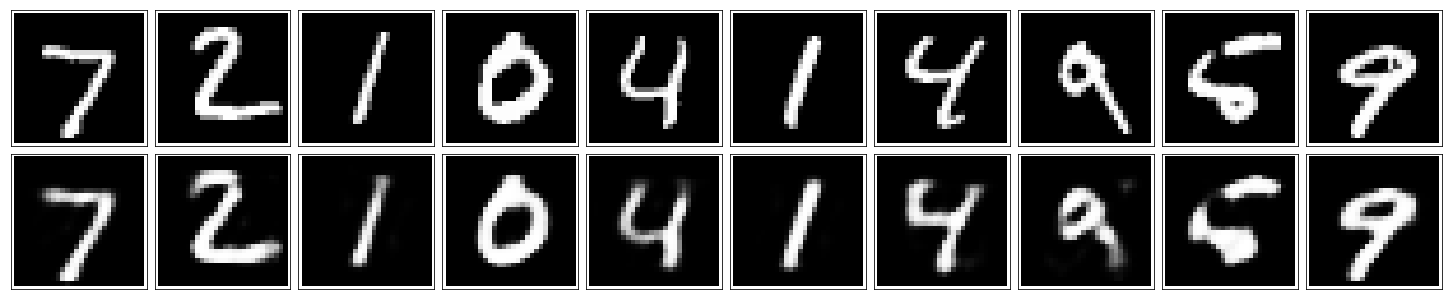

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [9]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.